# Траектория в сферических координатах
## Вариант 19

Тело движется по траектории в трехмерном пространсве. Положение тела задается сферической СК $\left( \varphi(t); \ \theta(t); \ r(t) \right)$


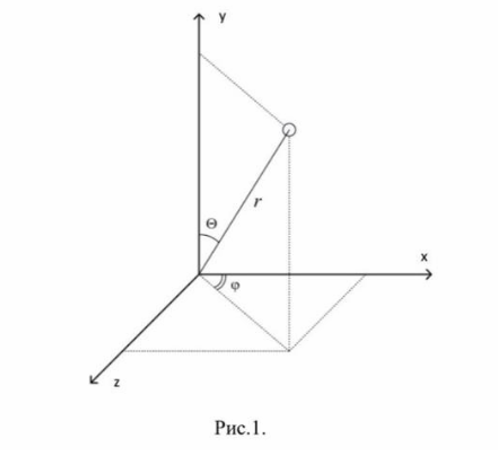

Построить график траектории движения в пространстве. Найти пройденный путь $S_{13}$ и вектор $\vec{\Delta r_{13}}$ между моментами времени $t_1$ и $t_3$.
Найти нормальные $a_n$ и тангенциальные $a_\tau$ составляющие ускорения в моменты времени  $t_1$, $t_2$ и $t_3$.
Посчитать значения выражения

$$
\left| \frac{a_n(t_1)}{a_\tau(t_1)} \right| + \left| \frac{a_n(t_2)}{a_\tau(t_2)} \right| + \left| \frac{a_n(t_3)}{a_\tau(t_3)} \right| + \frac{\left| \Delta \vec{r}_{13} \right|}{S_{13}} 
$$

и записать его в файл IDZ1.txt

## Исходные данные:
$$
t_1=1\ с, \ t_2=1.2 с, \ t_3=1.3 с
$$

$$
r(t)=1+0.3\sin(20t)
$$

$$
\varphi(t)=t
$$

$$
\theta(t)=-e^{-0.001t}+\frac{\pi}{2}
$$

# Траектория

Чтобы построить траекторию, выполним преобразование сферических координат в декартовые:
$$
x = r \sin(\theta) \cos(\varphi)
$$
$$
y = r \sin(\theta) \sin(\varphi)
$$
$$
z = r \cos(\theta)
$$

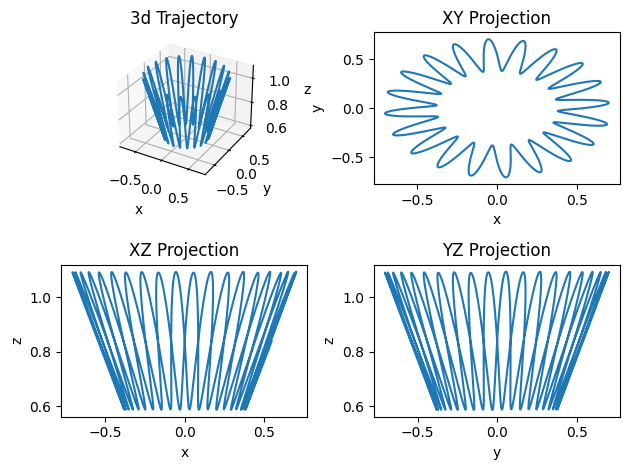

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Временной интервал
t = np.linspace(0, 2*np.pi, 1000)

# Определение функций для сферических координат
r = 1 + 0.3 * np.sin(20 * t)
phi = t
theta = -np.exp(-0.001 * t) + np.pi / 2

# Преобразование сферических координат в декартовы
x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)

# Построение графика
fig = plt.figure()

# Первый подграфик (3D)
ax1 = fig.add_subplot(221, projection='3d')  # 1 строка, 2 колонки, 1-й подграфик
ax1.plot(x, y, z)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax1.set_title('3d Trajectory')
plt.tight_layout()  # Для улучшения размещения подграфиков

# Второй подграфик (2D)
ax2 = fig.add_subplot(222)  # 1 строка, 2 колонки, 2-й подграфик
ax2.plot(x, y)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('XY Projection')
plt.tight_layout()

# Третий подграфик (2D)
ax3 = fig.add_subplot(223)  # 1 строка, 2 колонки, 2-й подграфик
ax3.plot(x, z)
ax3.set_xlabel('x')
ax3.set_ylabel('z')
ax3.set_title('XZ Projection')
plt.tight_layout()

# Четвертый подграфик (2D)
ax4 = fig.add_subplot(224)  # 1 строка, 2 колонки, 2-й подграфик
ax4.plot(y, z)
ax4.set_xlabel('y')
ax4.set_ylabel('z')
ax4.set_title('YZ Projection')
plt.tight_layout()

plt.show()

# Анимация Траектоии

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Временной интервал
t = np.linspace(0, 10, 500)

# Определение функций для сферических координат
r = 1 + 0.3 * np.sin(20 * t)
phi = t
theta = -np.exp(-0.001 * t) + np.pi / 2

# Преобразование сферических координат в декартовы
x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)

# Настройка графика
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([-2, 2])
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Animated Trajectory')

# Создание точки для анимации
point, = ax.plot([], [], [], 'ro')  # 'ro' означает красная точка
trajectory_line, = ax.plot([], [], [], 'b-')  # 'b-' означает синяя линия


# Инициализация функции
def init():
    point.set_data([], [])
    point.set_3d_properties([])
    trajectory_line.set_data([], [])
    trajectory_line.set_3d_properties([])
    return point, trajectory_line


# Функция обновления для анимации
def update(frame):
    # Обновляем позицию точки
    point.set_data(x[frame:frame + 1], y[frame:frame + 1])  # Передаем массив длиной 1
    point.set_3d_properties(z[frame:frame + 1])  # Передаем массив длиной 1

    # Обновляем данные для линии
    trajectory_line.set_data(x[:frame + 1], y[:frame + 1])  # Все данные до текущего кадра
    trajectory_line.set_3d_properties(z[:frame + 1])  # Все данные до текущего кадра

    return point, trajectory_line


# Создание анимации
ani = FuncAnimation(fig, update, frames=len(t), init_func=init, blit=True, interval=20)

# Сохранение анимации в формате GIF
# ani.save('trajectory_animation.gif', writer='pillow', fps=30)

# plt.show()


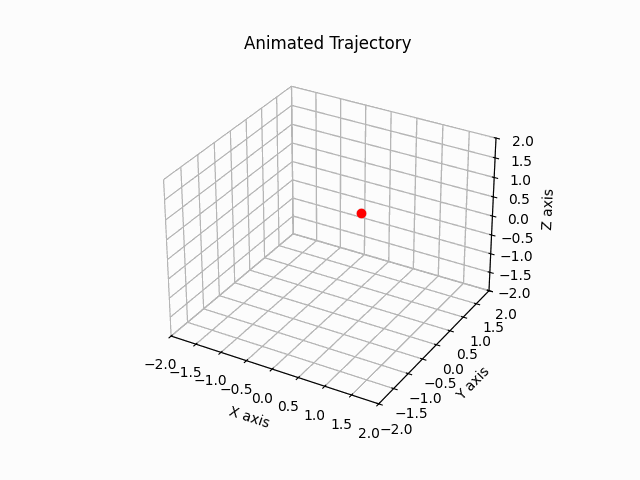

# Вектор $\vec{r}(t)$

Радиус вектор легко выражается через декартовые координаты, которые ранее уже были найдены, по следующей формуле
$$
\vec{r} = \{x, \ y, \ z\} = x\vec{e_x} + y\vec{e_y} + z\vec{e_z},
$$
где $\vec{e_x}, \ \vec{e_y}, \ \vec{e_z}$ - орты декартовой системы координат (единичные векторы)

Сделаем это с помощью символьной библиотеки sympy

In [3]:
import sympy as sp

# Определяем переменные
t = sp.symbols('t')

# Определяем функции в сферических координатах
r_t = 1 + 0.3 * sp.sin(20 * t)
phi_t = t
theta_t = -sp.exp(-0.001 * t) + sp.pi / 2

# Преобразуем в декартовы координаты
x_t = r_t * sp.sin(theta_t) * sp.cos(phi_t)
y_t = r_t * sp.sin(theta_t) * sp.sin(phi_t)
z_t = r_t * sp.cos(theta_t)

# Находим вектор r
r_vec = (x_t, y_t, z_t)

# Определяем t1 и t3
t1 = 1
t3 = 1.3

# Вычисляем векторы r(t1) и r(t3)
r_t1 = (x_t.subs(t, t1), y_t.subs(t, t1), z_t.subs(t, t1))
r_t3 = (x_t.subs(t, t3), y_t.subs(t, t3), z_t.subs(t, t3))

# Находим разность r(t3) - r(t1)
delta_r = (r_t3[0] - r_t1[0], r_t3[1] - r_t1[1], r_t3[2] - r_t1[2])

# Вычисляем модуль delta_r
delta_r_magnitude = sp.sqrt(delta_r[0]**2 + delta_r[1]**2 + delta_r[2]**2)


# Печатаем результаты
print("r(t):", r_vec)
print("r(t1):", r_t1)
print("r(t3):", r_t3)
print("r(t3) - r(t1):", delta_r)
print(f"|r(t3) - r(t1)|: {delta_r_magnitude} ≈ {float(delta_r_magnitude)}")

r(t): ((0.3*sin(20*t) + 1)*cos(t)*cos(exp(-0.001*t)), (0.3*sin(20*t) + 1)*sin(t)*cos(exp(-0.001*t)), (0.3*sin(20*t) + 1)*sin(exp(-0.001*t)))
r(t1): (0.541143086236494*(0.3*sin(20) + 1)*cos(1), 0.541143086236494*(0.3*sin(20) + 1)*sin(1), 0.25227915970143*sin(20) + 0.840930532338102)
r(t3): (0.177953237971601, 0.641005794121331, 1.03310883861376)
r(t3) - r(t1): (-0.541143086236494*(0.3*sin(20) + 1)*cos(1) + 0.177953237971601, -0.541143086236494*(0.3*sin(20) + 1)*sin(1) + 0.641005794121331, 0.192178306275659 - 0.25227915970143*sin(20))
|r(t3) - r(t1)|: sqrt((0.192178306275659 - 0.25227915970143*sin(20))**2 + (-0.541143086236494*(0.3*sin(20) + 1)*sin(1) + 0.641005794121331)**2 + (-0.541143086236494*(0.3*sin(20) + 1)*cos(1) + 0.177953237971601)**2) ≈ 0.20736488964957212


$$
\left| \Delta \vec{r}_{13} \right| = 0.20736488964957212
$$

# Пройденный путь $S(t)$

Пройденный путь опредяется по формуле
$$
S(t) = \int_{0}^{t}{v(t)dt},
$$
где $v(t)$ - модуль скорости, который можно найти по формулам

$$
v(t) = \sqrt{v_x^2 + v_y^2 + v_z^2}
$$
$$
v_x=\frac{dx}{dt}, \ v_y=\frac{dy}{dt}, \ v_z=\frac{dz}{dt}
$$

К сожалению, не получится вычислить пройденный путь с помощью символьной библиотеки sympy, так как искомый интеграл слишком сложный и, вероятно, не берется аналитически, поэтому вычислим его численно с помощью библиотеки scipy

In [4]:
import numpy as np
from scipy.integrate import quad

# Определяем переменную времени
t = sp.symbols('t')

# Определяем функции в сферических координатах
r_t = 1 + 0.3 * sp.sin(20 * t)
phi_t = t
theta_t = -sp.exp(-0.001 * t) + sp.pi / 2

# Преобразуем в декартовы координаты
x_t = r_t * sp.sin(theta_t) * sp.cos(phi_t)
y_t = r_t * sp.sin(theta_t) * sp.sin(phi_t)
z_t = r_t * sp.cos(theta_t)

# Находим скорость (производная положения по времени)
v_x = sp.diff(x_t, t)
v_y = sp.diff(y_t, t)
v_z = sp.diff(z_t, t)

# Вычисляем модуль скорости
v = sp.sqrt(v_x**2 + v_y**2 + v_z**2)

def speed(t_val):
    return v.subs(t, t_val)

# Определяем t1 и t3
t1 = 1
t3 = 1.3

# Численно вычисляем пройденный путь между t1 и t3
path_t1_t3, _ = quad(speed, t1, t3)

# Печатаем результаты
print("Пройденный путь между t1 и t3:", path_t1_t3)

Пройденный путь между t1 и t3: 1.1755928616566096


$$
S_{13} = 1.1755928616566096
$$

# Нормальное $a_n$ и тангенсальное $a_\tau$ ускорения

Нормальное ускорение вычислим по формуле:
$$
a_n(t) = \sqrt{a^2 - a_\tau^2},
$$

где $a$ - полное ускорение, $a_\tau$ - тангенсальное ускорение:

$$
a_\tau(t) = \frac{dv}{dt}
$$

$$
a(t) = \sqrt{a_x^2 + a_y^2 + a_z^2}
$$

$$
a_x = \frac{dv_x}{dt}, \quad a_y = \frac{dv_y}{dt}, \quad a_z = \frac{dv_z}{dt}
$$

выполним вычисления в sympy

In [5]:
import sympy as sp

# Определяем переменную времени
t = sp.symbols('t')

# Определяем функции в сферических координатах
r_t = 1 + 0.3 * sp.sin(20 * t)
phi_t = t
theta_t = -sp.exp(-0.001 * t) + sp.pi / 2

# Преобразуем в декартовы координаты
x_t = r_t * sp.sin(theta_t) * sp.cos(phi_t)
y_t = r_t * sp.sin(theta_t) * sp.sin(phi_t)
z_t = r_t * sp.cos(theta_t)

# Находим скорость (производная положения по времени)
v_x = sp.diff(x_t, t)
v_y = sp.diff(y_t, t)
v_z = sp.diff(z_t, t)

# Вычисляем модуль скорости
speed = sp.sqrt(v_x**2 + v_y**2 + v_z**2)

# Полное ускорение
a_x = sp.diff(v_x, t)
a_y = sp.diff(v_y, t)
a_z = sp.diff(v_z, t)
a = sp.sqrt(a_x**2 + a_y**2 + a_z**2)

# Тангенциальное ускорение
tangential_acceleration = abs(sp.diff(speed, t))

# нормальное ускорение
normal_acceleration = sp.sqrt(a**2 - tangential_acceleration**2)

# Подставляем значения времени для t1, t2 и t3
time_points = [1, 1.2, 1.3]
results = []

for t_value in time_points:
    normal_a_val = normal_acceleration.subs(t, t_value).evalf()
    tangential_a_val = tangential_acceleration.subs(t, t_value).evalf()
    results.append((t_value, normal_a_val, tangential_a_val))

# Вывод результатов
for t_value, normal_a_val, tangential_a_val in results:
    print(f"t = {t_value}: Нормальное ускорение = {normal_a_val}, Тангенциальное ускорение = {tangential_a_val}")


t = 1: Нормальное ускорение = 32.3478083377048, Тангенциальное ускорение = 105.094301557361
t = 1.2: Нормальное ускорение = 13.8831311118877, Тангенциальное ускорение = 107.599561968996
t = 1.3: Нормальное ускорение = 19.6702072485348, Тангенциальное ускорение = 89.8367794321750


$$
a_n(t_1) = 32.3478083377048, \ a_\tau(t_1) = 105.094301557361
$$
$$
a_n(t_2) = 13.8831311118877, \ a_\tau(t_2) = 107.599561968996
$$
$$
a_n(t_3) = 19.6702072485348, \ a_\tau(t_3) = 89.8367794321750
$$

# Найдем значения выражения

$$
\left| \frac{a_n(t_1)}{a_\tau(t_1)} \right| + \left| \frac{a_n(t_2)}{a_\tau(t_2)} \right| + \left| \frac{a_n(t_3)}{a_\tau(t_3)} \right| + \frac{\left| \Delta \vec{r}_{13} \right|}{S_{13}} 
$$


In [6]:
s = 0

for _, normal_a_val, tangential_a_val in results:
    s += abs(normal_a_val / tangential_a_val)

s += (float(delta_r_magnitude) / path_t1_t3)

print(s)

with open('IDZ1.txt', 'w', encoding='utf-8') as file:
    file.write(str(s))
    

0.832170539070023


$$
\left| \frac{a_n(t_1)}{a_\tau(t_1)} \right| + \left| \frac{a_n(t_2)}{a_\tau(t_2)} \right| + \left| \frac{a_n(t_3)}{a_\tau(t_3)} \right| + \frac{\left| \Delta \vec{r}_{13} \right|}{S_{13}} = 0.832170539070023
$$